In [1]:
!pip install lazypredict
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
target_url = 'http://users.stat.ufl.edu/~winner/data/airq402.dat'

response = requests.get(target_url)
data_dat = response.text

data_list = data_dat.splitlines() 

data_content = [e.split() for e in data_list]
cols = ['City1', 'City2', 'Average Fare', 'Distance', 'Average weekly passengers',
                   'market leading airline', 'market share 1', 'Average fare', 'Low price airline',
                   'market share 2', 'price']
df = pd.DataFrame(data_content, columns=cols)
df

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share 1,Average fare,Low price airline,market share 2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


In [3]:
df.describe()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share 1,Average fare,Low price airline,market share 2,price
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,90,85,980,771,921,16,928,972,19,918,970
top,ATL,TPA,165.91,1050,703.36,WN,100.0,68.86,WN,100.0,68.86
freq,64,46,4,5,3,257,4,3,230,4,3


In [4]:
num_col = ['Average Fare', 'Distance', 'Average weekly passengers',
                   'market share 1', 'Average fare', 'market share 2', 'price']
df[num_col] = df[num_col].astype(float)
df

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share 1,Average fare,Low price airline,market share 2,price
0,CAK,ATL,114.47,528.0,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860.0,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852.0,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288.0,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723.0,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104.0,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200.0,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814.0,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174.0,214.45,WN,99.74,73.44,WN,99.74,73.44


In [5]:
cat_col = ['City1', 'City2', 'market leading airline', 'Low price airline']
df[cat_col] = df[cat_col].astype('category')
df

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share 1,Average fare,Low price airline,market share 2,price
0,CAK,ATL,114.47,528.0,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860.0,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852.0,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288.0,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723.0,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104.0,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200.0,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814.0,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174.0,214.45,WN,99.74,73.44,WN,99.74,73.44


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   City1                      1000 non-null   category
 1   City2                      1000 non-null   category
 2   Average Fare               1000 non-null   float64 
 3   Distance                   1000 non-null   float64 
 4   Average weekly passengers  1000 non-null   float64 
 5   market leading airline     1000 non-null   category
 6   market share 1             1000 non-null   float64 
 7   Average fare               1000 non-null   float64 
 8   Low price airline          1000 non-null   category
 9   market share 2             1000 non-null   float64 
 10  price                      1000 non-null   float64 
dtypes: category(4), float64(7)
memory usage: 66.6 KB


In [7]:
df.drop(columns = ['Average fare'], inplace=True)
df

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share 1,Low price airline,market share 2,price
0,CAK,ATL,114.47,528.0,424.56,FL,70.19,FL,70.19,111.03
1,CAK,MCO,122.47,860.0,276.84,FL,75.10,DL,17.23,118.94
2,ALB,ATL,214.42,852.0,215.76,DL,78.89,CO,2.77,167.12
3,ALB,BWI,69.40,288.0,606.84,WN,96.97,WN,96.97,68.86
4,ALB,ORD,158.13,723.0,313.04,UA,39.79,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104.0,184.34,US,33.37,DL,28.65,118.51
996,TLH,TPA,83.28,200.0,232.71,FL,99.57,FL,99.57,82.55
997,TPA,IAD,159.97,814.0,843.80,US,46.19,DL,13.89,159.02
998,TPA,PBI,73.57,174.0,214.45,WN,99.74,WN,99.74,73.44


### EDA

In [8]:
from scipy.stats import shapiro
num_col.remove('Average fare')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

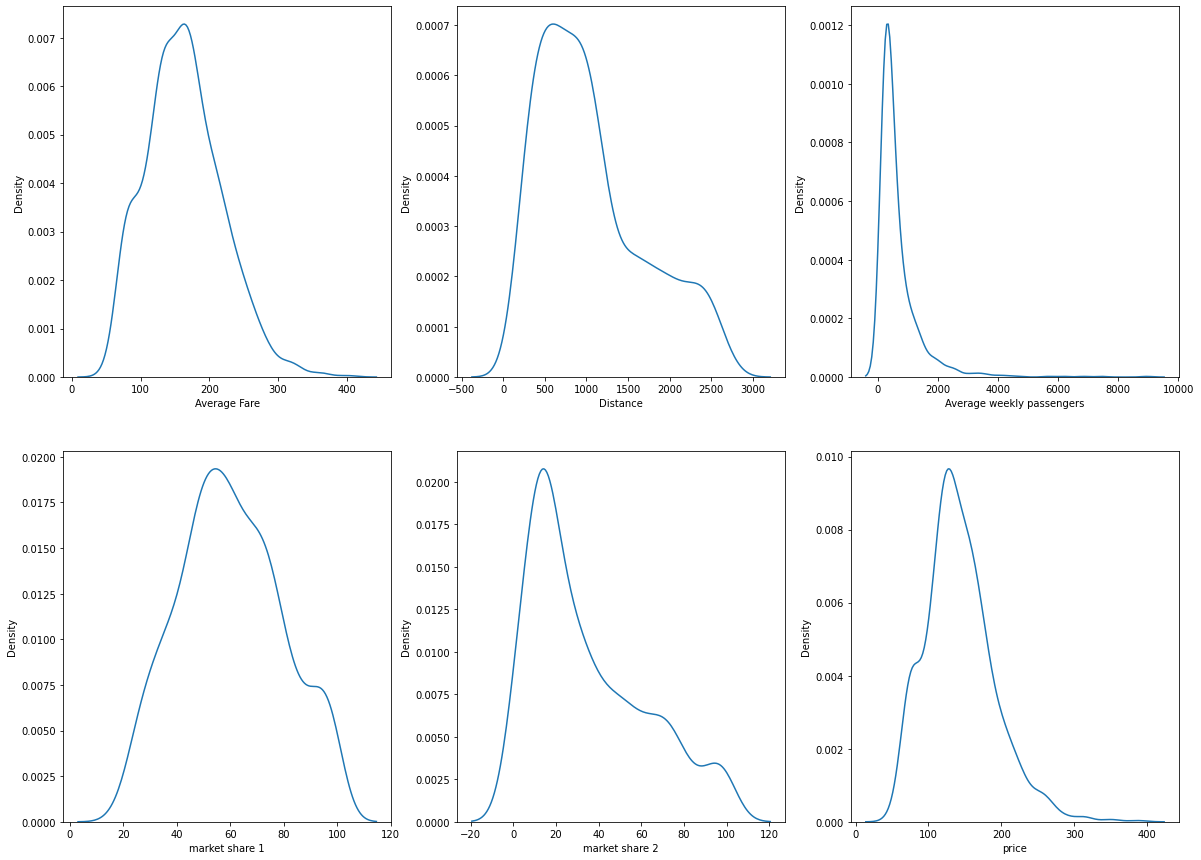

In [9]:
fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(20,15))
for i, ax in zip(num_col, axes.flat):
    sns.distplot(df[i], hist=False, ax=ax);
plt.show()

As we can see market share 1 and 2 are not the same.

[ATL, MCO, BWI, ORD, FLL, ..., HPN, HRL, LGB, MAF, PWM]
Length: 85
Categories (85, object): [ATL, MCO, BWI, ORD, ..., HRL, LGB, MAF, PWM]


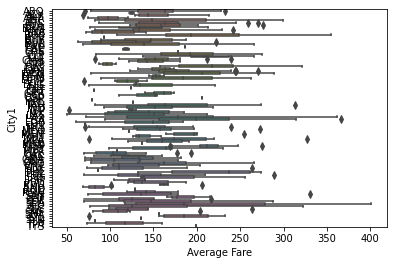

In [10]:
print(df["City2"].unique())
sns.boxplot( x=df["Average Fare"], y=df["City1"])

In [11]:
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace(".", "_")
df

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share_1,Low_price_airline,market_share_2,price
0,CAK,ATL,114.47,528.0,424.56,FL,70.19,FL,70.19,111.03
1,CAK,MCO,122.47,860.0,276.84,FL,75.10,DL,17.23,118.94
2,ALB,ATL,214.42,852.0,215.76,DL,78.89,CO,2.77,167.12
3,ALB,BWI,69.40,288.0,606.84,WN,96.97,WN,96.97,68.86
4,ALB,ORD,158.13,723.0,313.04,UA,39.79,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104.0,184.34,US,33.37,DL,28.65,118.51
996,TLH,TPA,83.28,200.0,232.71,FL,99.57,FL,99.57,82.55
997,TPA,IAD,159.97,814.0,843.80,US,46.19,DL,13.89,159.02
998,TPA,PBI,73.57,174.0,214.45,WN,99.74,WN,99.74,73.44


In [12]:
df.drop(['City1', 'City2'], axis=1, inplace = True)

In [13]:
df.head()

,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share_1,Low_price_airline,market_share_2,price
0,114.47,528.0,424.56,FL,70.19,FL,70.19,111.03
1,122.47,860.0,276.84,FL,75.10,DL,17.23,118.94
2,214.42,852.0,215.76,DL,78.89,CO,2.77,167.12
3,69.40,288.0,606.84,WN,96.97,WN,96.97,68.86
4,158.13,723.0,313.04,UA,39.79,WN,15.34,145.42


In [14]:
df = pd.get_dummies(data=df, columns=['market_leading_airline', 'Low_price_airline'], drop_first=True)
df

,Average_Fare,Distance,Average_weekly_passengers,market_share_1,market_share_2,price,market_leading_airline_AS,market_leading_airline_B6,market_leading_airline_CO,market_leading_airline_DL,market_leading_airline_F9,market_leading_airline_FL,market_leading_airline_G4,market_leading_airline_HP,market_leading_airline_NK,market_leading_airline_NW,market_leading_airline_TZ,market_leading_airline_UA,market_leading_airline_US,market_leading_airline_WN,market_leading_airline_YX,Low_price_airline_AQ,Low_price_airline_AS,Low_price_airline_AX,Low_price_airline_B6,Low_price_airline_CO,Low_price_airline_DL,Low_price_airline_F9,Low_price_airline_FL,Low_price_airline_G4,Low_price_airline_HP,Low_price_airline_NK,Low_price_airline_NW,Low_price_airline_SY,Low_price_airline_TZ,Low_price_airline_UA,Low_price_airline_US,Low_price_airline_WN,Low_price_airline_YX
0,114.47,528.0,424.56,70.19,70.19,111.03,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,122.47,860.0,276.84,75.10,17.23,118.94,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,214.42,852.0,215.76,78.89,2.77,167.12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,69.40,288.0,606.84,96.97,96.97,68.86,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,158.13,723.0,313.04,39.79,15.34,145.42,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,136.16,1104.0,184.34,33.37,28.65,118.51,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
996,83.28,200.0,232.71,99.57,99.57,82.55,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
997,159.97,814.0,843.80,46.19,13.89,159.02,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
998,73.57,174.0,214.45,99.74,99.74,73.44,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


0.8633167470165298
Feature: 0, Score: 0.01173
Feature: 1, Score: 0.00107
Feature: 2, Score: 0.44499
Feature: 3, Score: -0.44218
Feature: 4, Score: 0.79897
Feature: 5, Score: -21.21458
Feature: 6, Score: -31.08028
Feature: 7, Score: -1.64677
Feature: 8, Score: -10.12627
Feature: 9, Score: 15.22137
Feature: 10, Score: -14.82066
Feature: 11, Score: 0.00000
Feature: 12, Score: -18.02734
Feature: 13, Score: 3.79614
Feature: 14, Score: 13.12985
Feature: 15, Score: -15.92896
Feature: 16, Score: -0.15052
Feature: 17, Score: -7.67453
Feature: 18, Score: -23.55534
Feature: 19, Score: -7.58794
Feature: 20, Score: -14.88747
Feature: 21, Score: 7.58911
Feature: 22, Score: 33.66483
Feature: 23, Score: 23.96113
Feature: 24, Score: 13.52342
Feature: 25, Score: 6.11999
Feature: 26, Score: 7.74374
Feature: 27, Score: -0.86825
Feature: 28, Score: -0.00000
Feature: 29, Score: 2.98690
Feature: 30, Score: -9.79406
Feature: 31, Score: 6.40481
Feature: 32, Score: 1.03877
Feature: 33, Score: 11.45499
Feature: 

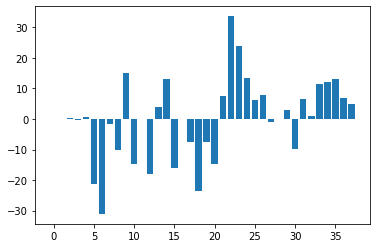

In [15]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
X, y = df.drop(['Average_Fare'], axis = 1), df['Average_Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.67, 
                                                    random_state=42)


# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
print(model.score(X_test,y_test))
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

0.7848621874698125
Feature: 0, Score: 0.01558
Feature: 1, Score: 0.02494
Feature: 2, Score: 0.01157
Feature: 3, Score: 0.11244
Feature: 4, Score: 0.77992
Feature: 5, Score: 0.00107
Feature: 6, Score: 0.00010
Feature: 7, Score: 0.00425
Feature: 8, Score: 0.00037
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00003
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00646
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00127
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.01966
Feature: 19, Score: 0.00005
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00080
Feature: 24, Score: 0.00897
Feature: 25, Score: 0.00277
Feature: 26, Score: 0.00040
Feature: 27, Score: 0.00290
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00278
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00016
Feature: 32, Score: 0.00015
Feature: 33, Score: 0.00269
Feature: 34, Score: 0.00009
Feature: 35

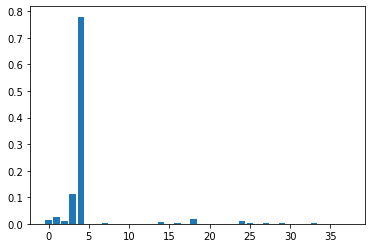

In [16]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import train_test_split
X, y = df.drop(['Average_Fare'], axis = 1), df['Average_Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.67, 
                                                    random_state=42)


# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
print(model.score(X_test,y_test))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

0.8732403253675701
Feature: 0, Score: 0.02038
Feature: 1, Score: 0.01844
Feature: 2, Score: 0.01354
Feature: 3, Score: 0.10655
Feature: 4, Score: 0.78658
Feature: 5, Score: 0.00029
Feature: 6, Score: 0.00005
Feature: 7, Score: 0.00249
Feature: 8, Score: 0.00099
Feature: 9, Score: 0.00019
Feature: 10, Score: 0.00005
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00029
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00868
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00150
Feature: 17, Score: 0.00068
Feature: 18, Score: 0.01860
Feature: 19, Score: 0.00052
Feature: 20, Score: 0.00003
Feature: 21, Score: 0.00005
Feature: 22, Score: 0.00011
Feature: 23, Score: 0.00087
Feature: 24, Score: 0.00434
Feature: 25, Score: 0.00296
Feature: 26, Score: 0.00052
Feature: 27, Score: 0.00282
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00204
Feature: 30, Score: 0.00021
Feature: 31, Score: 0.00069
Feature: 32, Score: 0.00015
Feature: 33, Score: 0.00126
Feature: 34, Score: 0.00193
Feature: 35

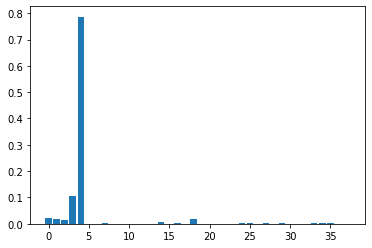

In [17]:
from sklearn.ensemble import RandomForestRegressor
# decision tree for feature importance on a regression problem


from sklearn.model_selection import train_test_split
X, y = df.drop(['Average_Fare'], axis = 1), df['Average_Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.67, 
                                                    random_state=42)


# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
print(model.score(X_test,y_test))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

0.8663254388193814
Feature: 0, Score: 0.00574
Feature: 1, Score: 0.00591
Feature: 2, Score: 0.00748
Feature: 3, Score: 0.05390
Feature: 4, Score: 0.46092
Feature: 5, Score: 0.00996
Feature: 6, Score: 0.00135
Feature: 7, Score: 0.01912
Feature: 8, Score: 0.00859
Feature: 9, Score: 0.00284
Feature: 10, Score: 0.00777
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00783
Feature: 13, Score: 0.00125
Feature: 14, Score: 0.08871
Feature: 15, Score: 0.00136
Feature: 16, Score: 0.00530
Feature: 17, Score: 0.00378
Feature: 18, Score: 0.12373
Feature: 19, Score: 0.04014
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00134
Feature: 22, Score: 0.00003
Feature: 23, Score: 0.00663
Feature: 24, Score: 0.00689
Feature: 25, Score: 0.01640
Feature: 26, Score: 0.00638
Feature: 27, Score: 0.04261
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.01388
Feature: 30, Score: 0.00024
Feature: 31, Score: 0.00448
Feature: 32, Score: 0.00234
Feature: 33, Score: 0.01768
Feature: 34, Score: 0.00464
Feature: 35

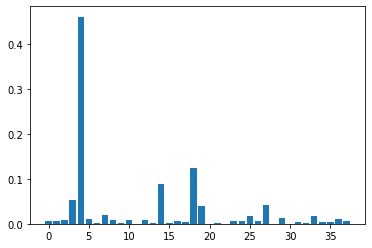

In [18]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
X, y = df.drop(['Average_Fare'], axis = 1), df['Average_Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.67, 
                                                    random_state=42)


# define the model
model = XGBRegressor()
# fit the model
model.fit(X_train, y_train)
print(model.score(X_test,y_test))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [53]:

# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(XGBRegressor(n_estimators=1000), max_features=7)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# define the dataset
X, y = X, y = df.drop(['Average_Fare'], axis = 1), df['Average_Fare']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = XGBRegressor(n_estimators=100)
model.fit(X_train_fs, y_train)
# evaluate the model
print(model.score(X_test_fs, y_test))


0.8309240125966109


In [54]:
from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07, 0.1], #so called `eta` value
              'max_depth': [2, 3, 4, 5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [None, 0.2, 0.7],
              'colsample_bytree': [None, 0.7],
              'n_estimators': [50, 100]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train_fs,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   14.6s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:   28.7s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:   50.5s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  1.2min


[09:38:46] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:38:46] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:38:46] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
0.8752817220761161
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 100, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': None}


[Parallel(n_jobs=5)]: Done 1440 out of 1440 | elapsed:  1.4min finished


In [55]:
xgb_best = XGBRegressor(params = xgb_grid.best_params_)
xgb_best.fit(X_train_fs, y_train)
xgb_best.score(X_test_fs, y_test)

[09:38:46] WARNING: /workspace/src/learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.8309240125966109

In [ ]:
!pip install lazypredict

In [24]:
### Importing LazyRegressor
from lazypredict.Supervised import LazyRegressor
### Importing dataset available in sklearn
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [58]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
### fitting data in LazyClassifier
models, predictions = reg.fit(X_train_fs, X_test_fs, y_train, y_test)
### lets check which model did better on Breast Cancer Dataset
print(models)

100%|██████████| 42/42 [00:04<00:00,  8.62it/s]

                               Adjusted R-Squared  ...  Time Taken
Model                                              ...            
KNeighborsRegressor                          0.89  ...        0.04
GradientBoostingRegressor                    0.87  ...        0.14
ExtraTreesRegressor                          0.87  ...        0.21
RandomForestRegressor                        0.85  ...        0.29
HistGradientBoostingRegressor                0.84  ...        1.16
BaggingRegressor                             0.84  ...        0.04
LGBMRegressor                                0.84  ...        0.28
XGBRegressor                                 0.83  ...        0.15
BayesianRidge                                0.83  ...        0.02
RidgeCV                                      0.83  ...        0.01
Ridge                                        0.83  ...        0.01
TransformedTargetRegressor                   0.83  ...        0.01
LinearRegression                             0.83  ...        

In [59]:
print(reg.models)

{'AdaBoostRegressor': Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Int64Index([0, 1, 2, 3, 4], dtype='int64')),
                                                 ('categorical_low',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                            

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

# GridSearchCV will replace n_neighbors by values in param_grid.
grid_search = GridSearchCV(model,
                           param_grid={"n_neighbors": range(1, 20)},
                           scoring="neg_mean_squared_error",
                           cv=10)
grid_search.fit(X_train_fs, y_train)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

KNeighborsRegressor(n_neighbors=10)
-484.7719576625


In [52]:
model = KNeighborsRegressor(n_neighbors=)
model.fit(X, y)
# evaluate the model
print(model.score(X, y))

0.6613789544632542
